In [1]:
import pandas as pd
import numpy as np
import math
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt

import cv2

print ('ok')

ok


In [2]:
#path for each type of scan in the dataset
CNV_path = '/kaggle/input/kermany2018/OCT2017 /train/CNV/'
DME_path = '/kaggle/input/kermany2018/OCT2017 /train/DME/'
DRUSEN_path = '/kaggle/input/kermany2018/OCT2017 /train/DRUSEN/'
NORMAL_path = '/kaggle/input/kermany2018/OCT2017 /train/NORMAL/'

CNV = os.listdir(CNV_path)
DME = os.listdir(DME_path)
DRUSEN = os.listdir(DRUSEN_path)
NORMAL = os.listdir(NORMAL_path)

print('done')

done


In [3]:
#the following 
train_dir = '/kaggle/input/kermany2018/OCT2017 /train/'
test_dir = '/kaggle/input/kermany2018/OCT2017 /test/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = (train_paths, train_labels)

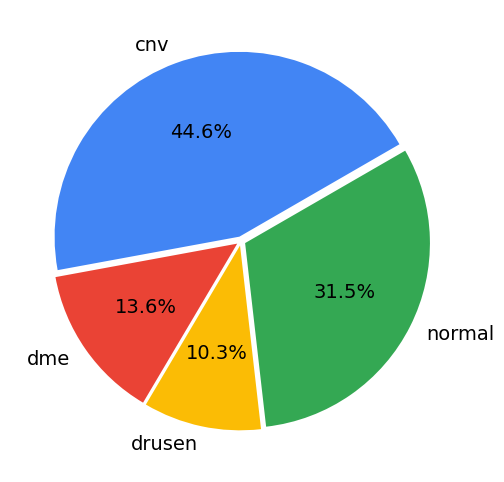

In [4]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='CNV']),
         len([x for x in train_labels if x=='DME']),
         len([x for x in train_labels if x=='DRUSEN']),
         len([x for x in train_labels if x=='NORMAL'])],
        labels=['cnv','dme', 'drusen', 'normal'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

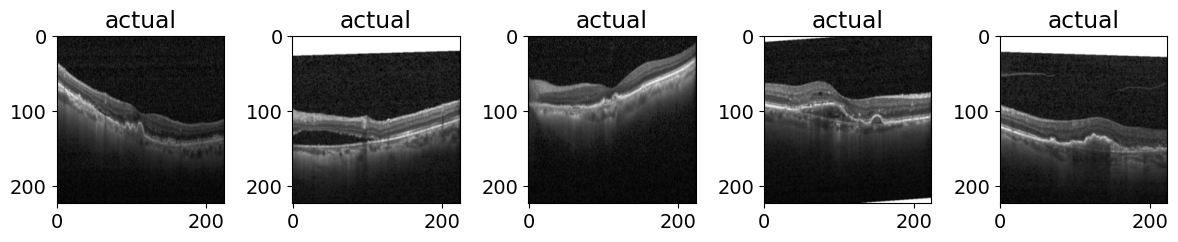

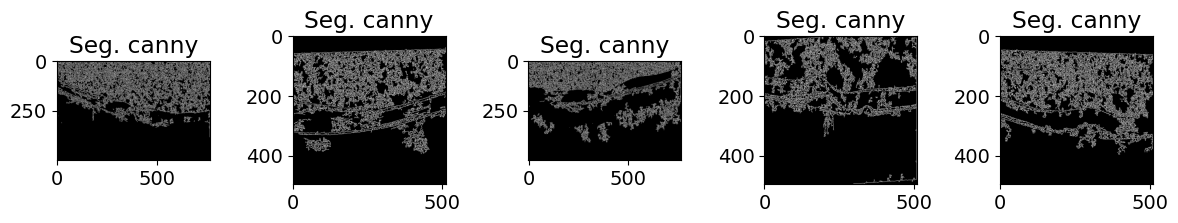

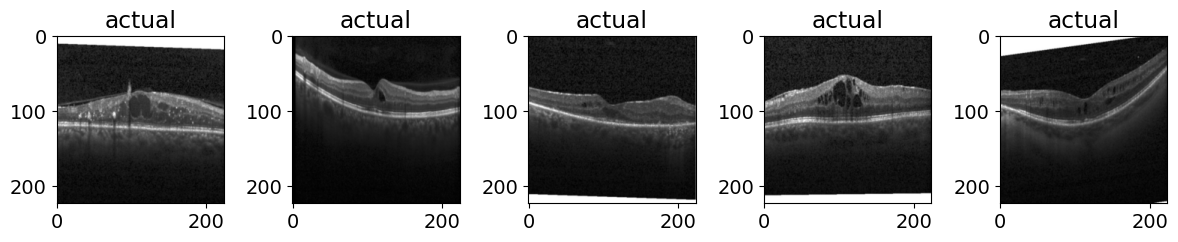

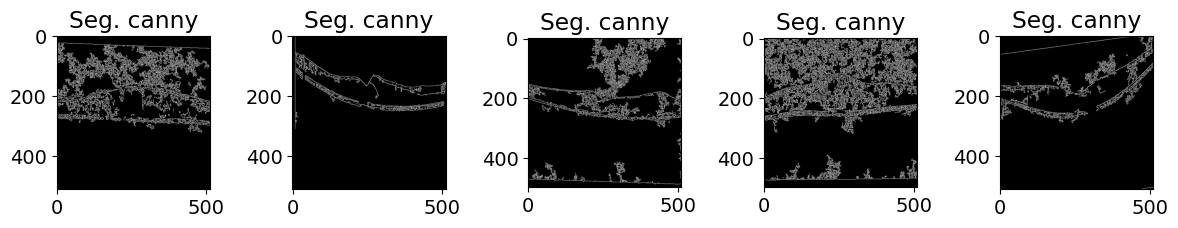

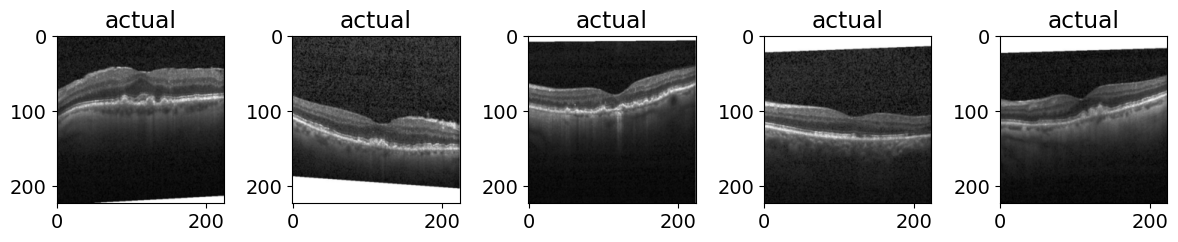

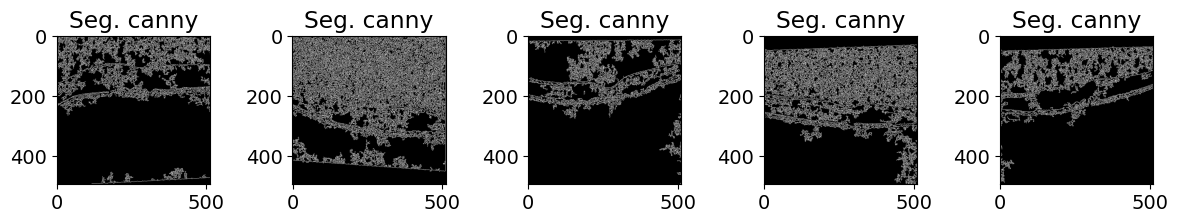

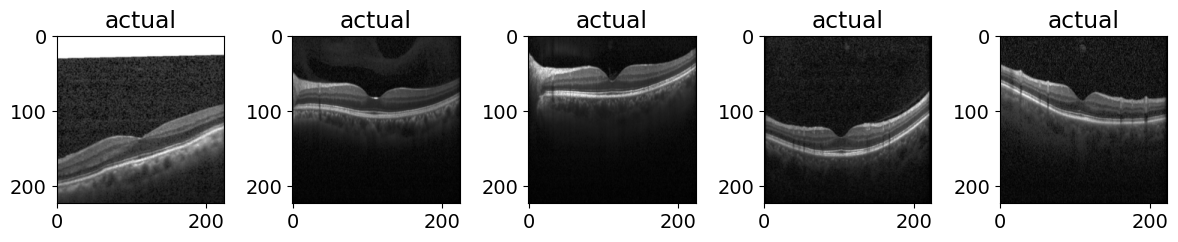

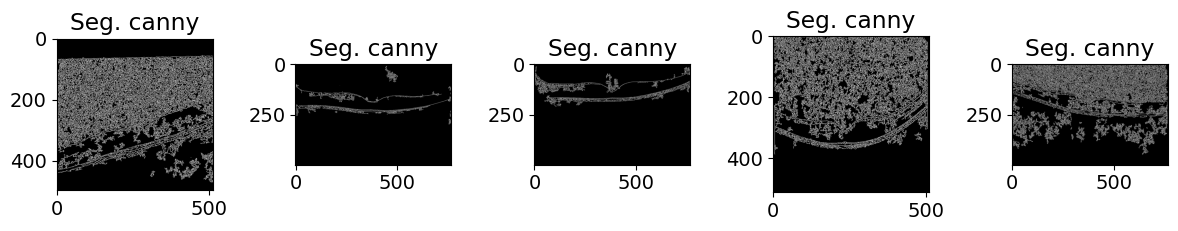

In [5]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(CNV_path + "/" + CNV[i])
    img = cv2.GaussianBlur(img,(5,5),0)
    img = cv2.resize(img,(224,224),0)
    plt.imshow(img,cmap='gray')
    plt.title('actual')
    plt.tight_layout()
    
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(CNV_path + "/" + CNV[i])
    edges = cv2.Canny(img,25, 255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. canny')
    plt.tight_layout()
    
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(DME_path + "/" + DME[i])
    img = cv2.GaussianBlur(img,(5,5),0)
    img = cv2.resize(img,(224,224),0)
    plt.imshow(img,cmap='gray')
    plt.title('actual')
    plt.tight_layout()
    
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(DME_path + "/" + DME[i])
    edges = cv2.Canny(img,25, 255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. canny')
    plt.tight_layout()
    
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(DRUSEN_path + "/" + DRUSEN[i])
    img = cv2.GaussianBlur(img,(5,5),0)
    img = cv2.resize(img,(224,224),0)
    plt.imshow(img,cmap='gray')
    plt.title('actual')
    plt.tight_layout()
    
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(DRUSEN_path + "/" + DRUSEN[i])
    edges = cv2.Canny(img,25, 255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. canny')
    plt.tight_layout()
    
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(NORMAL_path + "/" + NORMAL[i])
    img = cv2.GaussianBlur(img,(5,5),0)
    img = cv2.resize(img,(224,224),0)
    plt.imshow(img,cmap='gray')
    plt.title('actual')
    plt.tight_layout()
    
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread(NORMAL_path + "/" + NORMAL[i])
    edges = cv2.Canny(img,25, 255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. canny')
    plt.tight_layout()